# 1)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = np.genfromtxt('allsky_sample.csv', delimiter=",", skip_header=1)

In [8]:
!head allsky_sample.csv

run,rerun,camcol,field,obj,type,ra,dec,psfMag_r,psfMag_g,psfMagErr_r,psfMagErr_g
7757,301,1,74,186,6,8.12944435106658,26.6266172894736,17.04889,18.16535,0.01654805,0.02145229
7757,301,1,74,187,6,8.12783867556709,26.627245975921,17.37402,17.92875,0.02894481,0.02568013
7757,301,1,74,188,3,8.12732322524192,26.6251199416623,20.1466,21.35297,0.3003744,0.3302762
4288,301,1,39,682,3,24.5161170422305,-1.16579446393527,22.97032,24.3259,0.2672399,0.5240437
4288,301,1,39,683,3,24.5179406515354,-1.1792069022485,22.62052,25.09109,0.1850479,0.6585805
4288,301,1,39,684,6,24.5189463293148,-1.15915086108891,21.4247,23.04125,0.06608655,0.1968172
4136,301,1,61,935,6,36.4715922759092,-1.06093938828308,22.71782,23.14112,0.158014,0.1799687
4136,301,1,61,936,3,36.4717583013136,-1.1378448207726,22.81683,23.88123,0.1742272,0.3260605
4136,301,1,61,937,3,36.4717582434391,-1.13784497192974,22.81147,23.87586,0.1734457,0.3247895


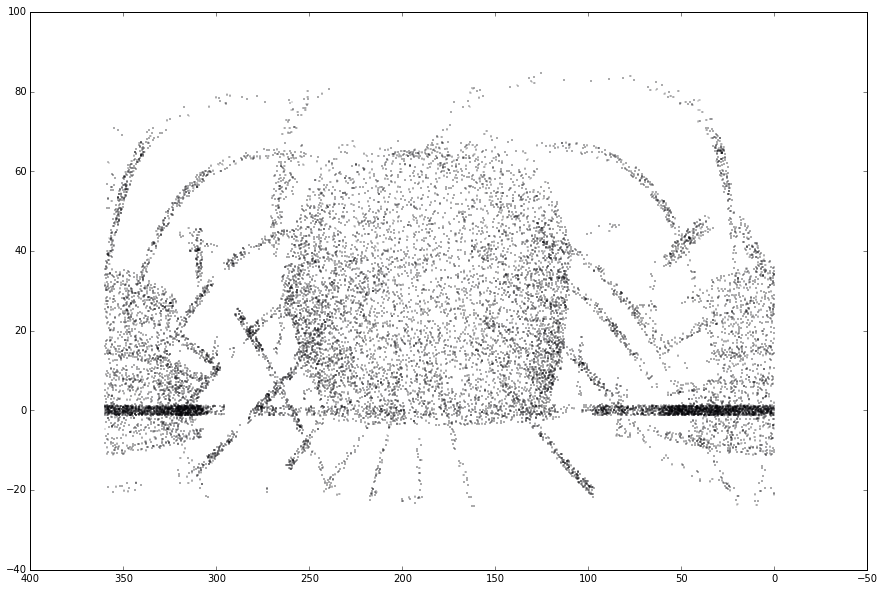

In [9]:
ra = data[:,6]
dec = data[:,7]

fig, ax = subplots(figsize=(15,10))
ax.scatter(ra, dec, marker='.', s=0.1)
ax.invert_xaxis()

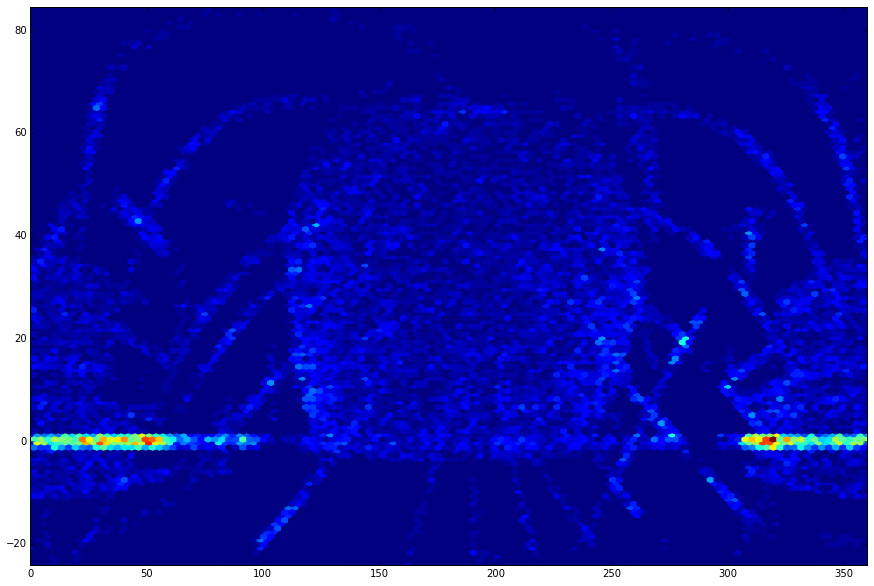

In [10]:

fig, ax = subplots(figsize=(15,10))
plt.hexbin(ra, dec, cmap=cm.jet, gridsize=120)

# 2)

In [11]:
def equgal(ra,dec):
    b = np.arcsin(np.sin(dec)*np.cos(1.0926)-np.cos(dec)*np.sin(ra-4.9262)*np.sin(1.0926))
    l = np.arccos((np.cos(dec)*np.cos(ra-4.9262))/(np.cos(b)))+0.57596
    return b, l


In [12]:
ra_r = ra*np.pi/180
dec_r = dec*np.pi/180
print ra_r[0]
print dec_r[0]

0.141885570284
0.46472214037


In [74]:
b, l = equgal(ra_r,dec_r)

In [14]:
print b[0]
print l[0]

-0.625344528001
2.0674364919


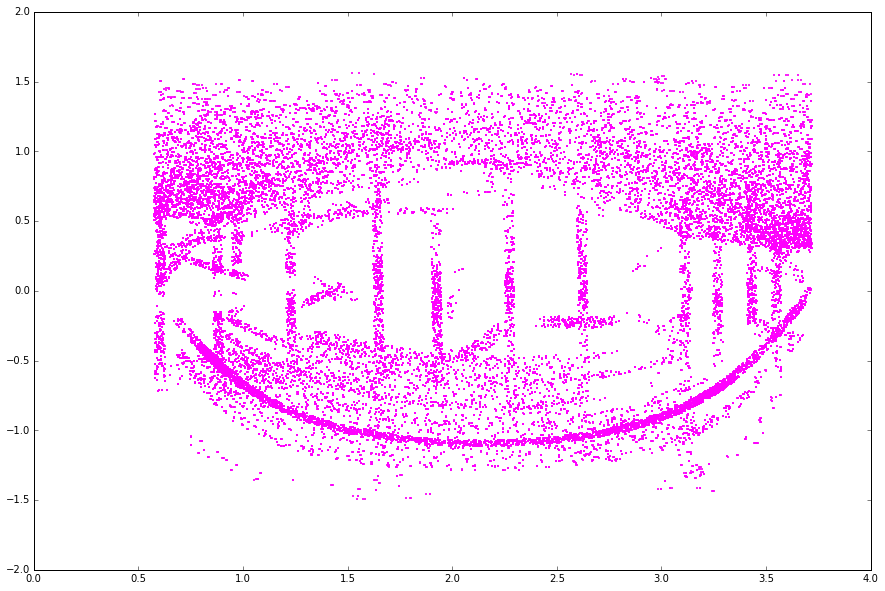

In [15]:
fig, ax = subplots(figsize=(15,10))
ax.scatter(l, b, marker='.', s=0.1)






ax.scatter(l, b, marker='o', s=1.0, color="magenta")

In [16]:
data.shape

(50187, 12)

In [17]:
ra.shape

(50187,)

In [18]:
b.shape

(50187,)

In [102]:
print b[np.argsort(np.absolute(b))][0:5]

[ 0.00018907  0.00020777  0.00023848 -0.00025733 -0.00026487]


In [105]:
print ra[np.absolute(b)<0.000265]
print dec[np.absolute(b)<0.000265]

[  30.31963128   30.32108368   30.32164964  307.86959285   25.49209167]
[ 61.41278392  61.41147037  61.41433807  39.80978861  61.95064133]


In [106]:
p_ra = ra[np.absolute(b)<0.000265]
p_dec = dec[np.absolute(b)<0.000265]

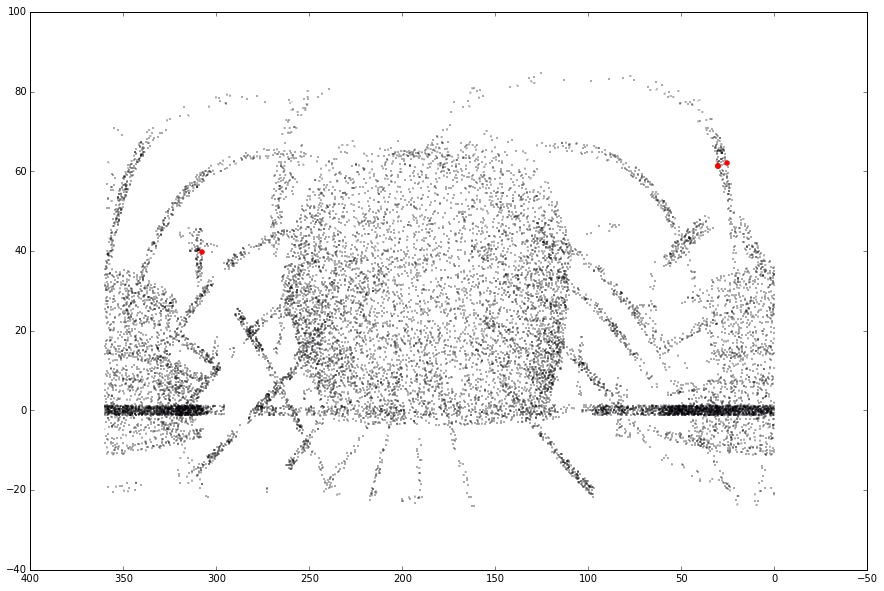

In [108]:
ra = data[:,6]
dec = data[:,7]

fig, ax = subplots(figsize=(15,10))
ax.scatter(ra, dec, marker='.', s=0.1)
ax.scatter(p_ra, p_dec, marker='o', s=20.0, color="red")
ax.invert_xaxis()

# 3)

In [129]:
def gc_dist(lon1, lat1, lon2, lat2):
    dist = np.arccos(np.sin(lat1)*np.sin(lat2)+(np.cos(lat1)*np.cos(lat2)*np.cos(np.abs(lon2-lon1))))
    return np.degrees(dist)

In [25]:
!head small_sdss.csv

ra,dec,psfMag_r,psfMag_g
0.0153030018142033,0.497910122673647,20.83795,22.43304
0.0155254460067056,0.476369931445661,23.81754,25.23864
0.0156044243202587,0.367336744895203,21.90833,23.72946
0.0156877062330523,0.41376021951875,21.6733,22.32353
0.0157825575495281,0.246324002889212,22.40364,22.87551
0.0160881708884801,0.456074885097821,22.57446,23.9067
0.0162308386980783,0.433071551298386,21.10841,20.97273
0.0170396790074623,0.186422181541019,24.0673,25.22332
0.0170465349384585,0.410386215894388,24.3411,24.95228


In [26]:
sdss = np.genfromtxt('small_sdss.csv', delimiter=",", skip_header=1)

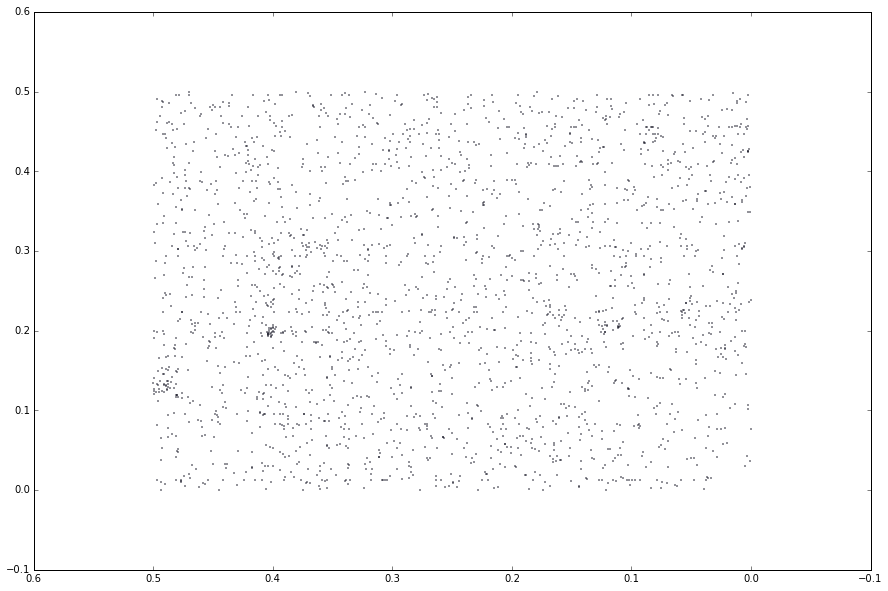

In [110]:
s_ra = sdss[:,0]
s_dec = sdss[:,1]


fig, ax = subplots(figsize=(15,10))
ax.scatter(s_ra, s_dec, marker='.', s=1.0)
ax.invert_xaxis()

In [111]:
s_ra.shape

(2320,)

In [53]:
what = np.triu_indices(2319,1)

In [31]:
print what[0]
print what[1]
what[0].shape

[   0    0    0 ..., 2317 2317 2318]
[   1    2    3 ..., 2318 2319 2319]


(2690040,)

In [130]:
s_ra_r = (s_ra*np.pi/180)
s_dec_r = (s_dec*np.pi/180)

In [131]:
dist = gc_dist(s_ra_r[what[0]], s_dec_r[what[0]], s_ra_r[what[1]], s_dec_r[what[1]])

In [114]:
print dist[0:9]

[ 1.57072019  1.57073535  1.57072686  1.5707506   1.57071345  1.57071445
  1.57073774  1.57070366  1.56944459]


In [115]:
dist.shape

(2687721,)

(array([  3.38500000e+03,   7.94500000e+03,   1.23650000e+04,
          1.67750000e+04,   2.12070000e+04,   2.49130000e+04,
          2.85310000e+04,   3.23360000e+04,   3.58950000e+04,
          3.88130000e+04,   4.18830000e+04,   4.44430000e+04,
          4.70420000e+04,   4.94520000e+04,   5.12000000e+04,
          5.32810000e+04,   5.51890000e+04,   5.63900000e+04,
          5.84680000e+04,   5.95180000e+04,   6.11770000e+04,
          6.21830000e+04,   6.37120000e+04,   6.35610000e+04,
          6.44930000e+04,   6.44720000e+04,   6.49740000e+04,
          6.45150000e+04,   6.45130000e+04,   6.49910000e+04,
          6.42190000e+04,   6.47420000e+04,   6.37740000e+04,
          6.28200000e+04,   6.19040000e+04,   6.04450000e+04,
          5.89050000e+04,   5.81020000e+04,   5.60690000e+04,
          5.53300000e+04,   5.39760000e+04,   5.20470000e+04,
          5.07800000e+04,   4.89210000e+04,   4.72700000e+04,
          4.50940000e+04,   4.30470000e+04,   4.05460000e+04,
        

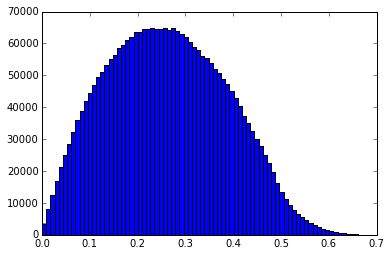

In [132]:
plt.hist(dist,80)